# Assignment 1 Group XX



## Question 1

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, jarque_bera, kstest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from portfolio import Portfolio_Optimizer
from pfolioutils import evaluate_strategies, plot_weight_matrices
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting



In [4]:
index_df = pd.read_excel('PS1_data_clean.xlsx', sheet_name='indices',index_col='date')
fx_df = pd.read_excel('PS1_data_clean.xlsx', sheet_name='currencies',index_col='date')
weight_df = pd.read_excel('PS1_data_clean.xlsx', sheet_name='market_cap')

index_df.head()

,SPTSX INDEX,CAC INDEX,DAX INDEX,SX5E INDEX,NKY INDEX,UKX INDEX,SPX INDEX,IBOV INDEX
date,,,,,,,,
03/30/2007,13165.500000,5634.160156,6917.029785,4181.029785,17287.650391,6308.03,1420.86,45805
04/02/2007,13265.799805,5645.560059,6937.169922,4189.549805,17028.410156,6315.53,1424.55,45597
04/03/2007,13361.200195,5711.910156,7045.560059,4246.299805,17244.050781,6366.11,1437.77,46288
04/04/2007,13448.299805,5739.009766,7073.910156,4261.830078,17544.089844,6364.70,1439.37,46554
04/05/2007,13425.000000,5741.379883,7099.910156,4271.540039,17491.419922,6397.34,1443.76,46647


In [5]:
# convert to dollar
for index in index_df.columns:
    curr = weight_df[weight_df['Ticker'] == index]['Currency'].to_string()[-3:]
    index_df[index] = index_df[index]*fx_df[curr]

In [6]:
logreturns_df = np.log(index_df) - np.log(index_df.shift(1))
logreturns_df = logreturns_df.dropna()

mean_values = logreturns_df.mean()
std_deviation = logreturns_df.std()
kurtosis_values = logreturns_df.kurtosis()
skewness_values = logreturns_df.skew()

statistics_table = pd.DataFrame({
    'Mean': mean_values,
    'Standard Deviation': std_deviation,
    'Kurtosis': kurtosis_values,
    'Skewness': skewness_values
})

statistics_table

,Mean,Standard Deviation,Kurtosis,Skewness
SPTSX INDEX,0.000117,0.015251,12.306159,-0.866287
CAC INDEX,0.000025,0.018352,17.583211,0.372231
DAX INDEX,0.000207,0.018058,16.916223,0.410990
SX5E INDEX,-0.000041,0.018481,16.980611,0.283744
NKY INDEX,0.000165,0.016163,16.738605,-0.552431
UKX INDEX,-0.000065,0.015374,10.097418,-0.274447
SPX INDEX,0.000374,0.013581,12.021852,-0.637743
IBOV INDEX,-0.000060,0.024794,11.078068,-0.154794


In [7]:
logreturns_df.corr()


,SPTSX INDEX,CAC INDEX,DAX INDEX,SX5E INDEX,NKY INDEX,UKX INDEX,SPX INDEX,IBOV INDEX
SPTSX INDEX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC INDEX,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX INDEX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
SX5E INDEX,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NKY INDEX,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
UKX INDEX,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SPX INDEX,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOV INDEX,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


In [8]:

for col in logreturns_df.columns:
    jarque_bera_statistic, jarque_bera_p_value = jarque_bera(logreturns_df[col])
    print(f'Jarque-Bera test p-value for {col}: {jarque_bera_p_value}')

Jarque-Bera test p-value for SPTSX INDEX: 0.0
Jarque-Bera test p-value for CAC INDEX: 0.0
Jarque-Bera test p-value for DAX INDEX: 0.0
Jarque-Bera test p-value for SX5E INDEX: 0.0
Jarque-Bera test p-value for NKY INDEX: 0.0
Jarque-Bera test p-value for UKX INDEX: 0.0
Jarque-Bera test p-value for SPX INDEX: 0.0
Jarque-Bera test p-value for IBOV INDEX: 0.0


In [9]:
for col in logreturns_df.columns:
    ks_statistic, ks_p_value = kstest(logreturns_df[col], 'norm')
    print(f'Kolmogorov-Smirnov test p-value for {col}: {ks_p_value}')

Kolmogorov-Smirnov test p-value for SPTSX INDEX: 0.0
Kolmogorov-Smirnov test p-value for CAC INDEX: 0.0
Kolmogorov-Smirnov test p-value for DAX INDEX: 0.0
Kolmogorov-Smirnov test p-value for SX5E INDEX: 0.0
Kolmogorov-Smirnov test p-value for NKY INDEX: 0.0
Kolmogorov-Smirnov test p-value for UKX INDEX: 0.0
Kolmogorov-Smirnov test p-value for SPX INDEX: 0.0
Kolmogorov-Smirnov test p-value for IBOV INDEX: 0.0


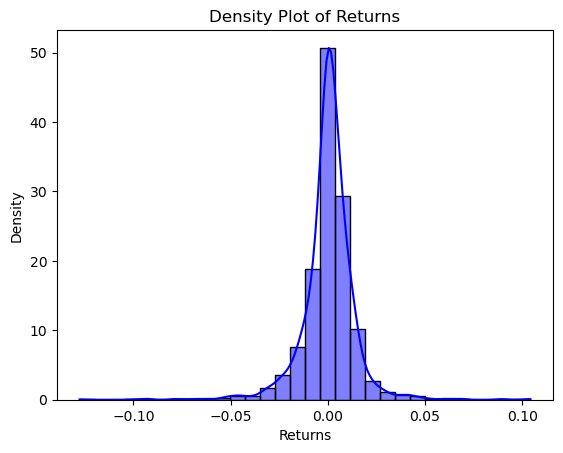

In [10]:
# Assuming 'returns_df' is already defined from your previous code
returns_column = logreturns_df['SPX INDEX']  # Replace 'YourColumnName' with the actual column name

# Plot the density
sns.histplot(returns_column, kde=True, bins=30, color='blue', stat='density')
plt.title('Density Plot of Returns')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.show()


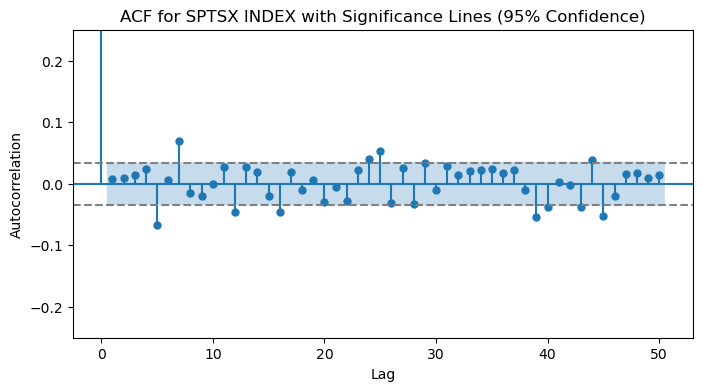

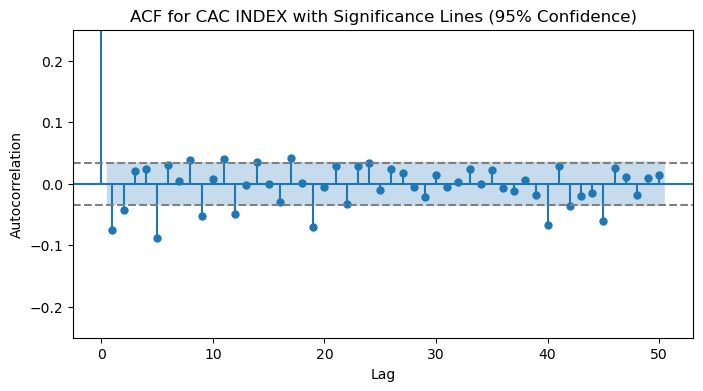

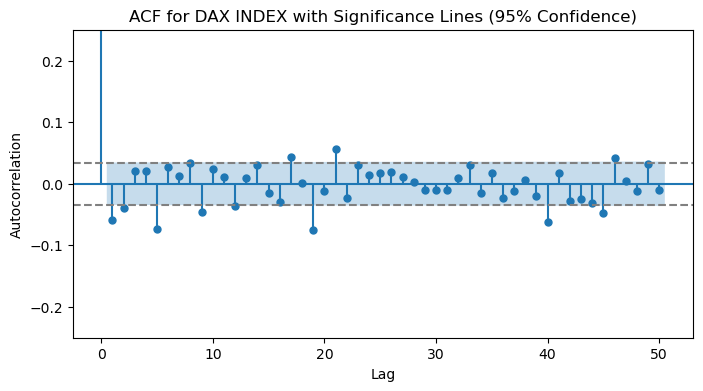

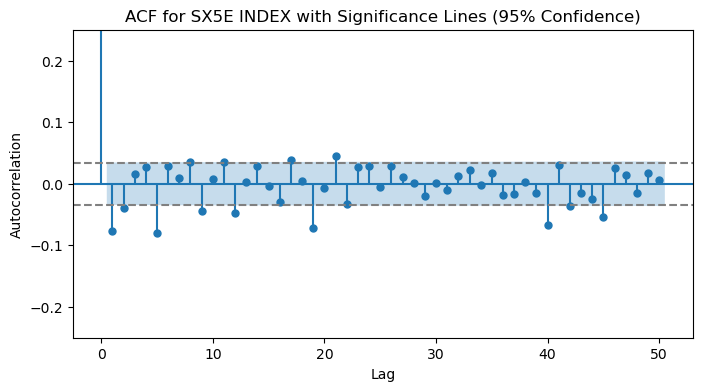

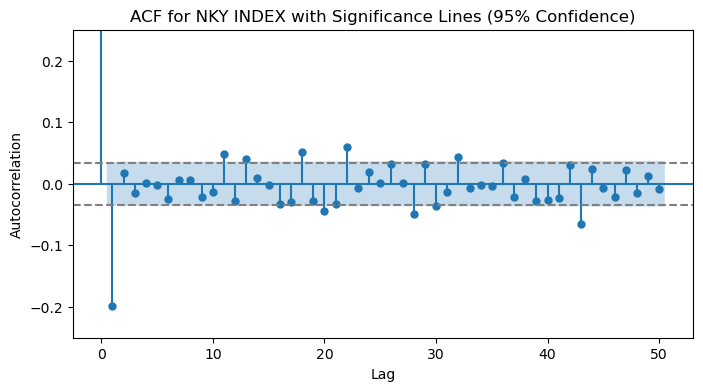

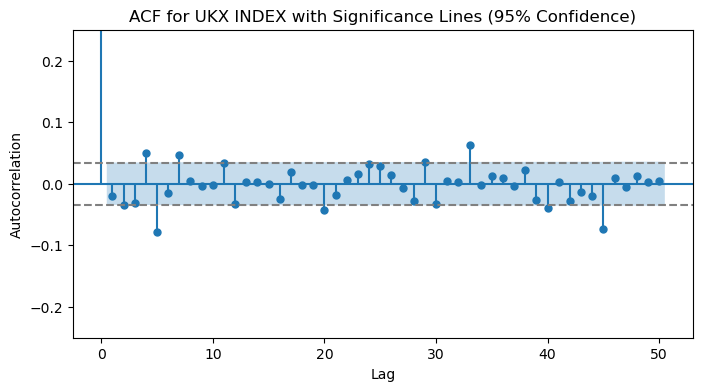

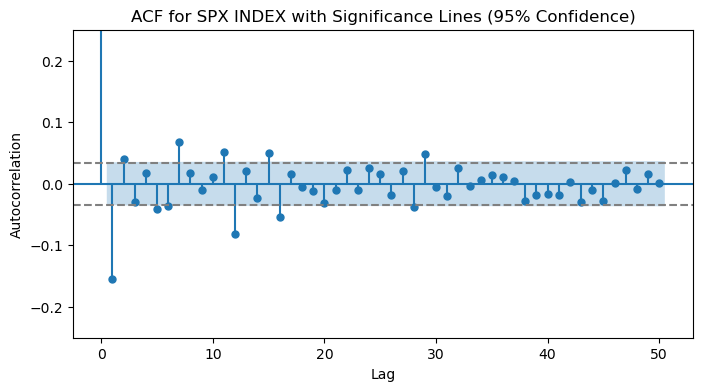

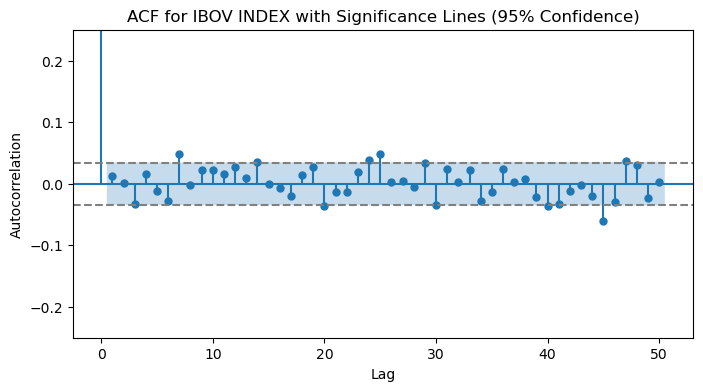

In [11]:
confidence_level = 0.95
num_lags = 50

for col in logreturns_df.columns:
    series = logreturns_df[col].dropna()
    
    # Calculate autocorrelation values
    acf_values = acf(series, fft=True, nlags=num_lags)
    
    # Plot ACF with significance lines
    fig, ax = plt.subplots(figsize=(8, 4))
    plot_acf(series, lags=num_lags, ax=ax, alpha=0.05)
    
    # Add significance lines
    critical_value = 1.96 / (len(series) ** 0.5)  # 95% confidence interval
    ax.axhline(y=critical_value, linestyle='--', color='gray')
    ax.axhline(y=-critical_value, linestyle='--', color='gray')
    
    plt.ylim([-0.25, 0.25])
    plt.title(f'ACF for {col} with Significance Lines (95% Confidence)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

## Question 2 

### Long Short Scenario

In [17]:
returns_df = index_df.pct_change().dropna()

ls_portfolio = Portfolio_Optimizer(returns_df, short=True)

In [18]:
market_cap_weights = np.array(weight_df['MktCap%'])

custom_weigths = {
    'Mkt Cap Weighted Portfolio': market_cap_weights
}

ls_portfolio.performance_summary(custom_weights=custom_weigths)

Max Sharpe Portfolio:
   - Return: 0.2042542906303695
   - Standard Deviation (Risk): 0.2073217359400867
   - Sharpe Ratio: 0.9852044200970628

Min Variance Portfolio:
   - Return: 0.09243536876523031
   - Standard Deviation (Risk): 0.16582570142434142
   - Sharpe Ratio: 0.557424862197277

Equal Weight Portfolio:
   - Return: 0.06216202345229385
   - Standard Deviation (Risk): 0.22268786570377302
   - Sharpe Ratio: 0.279144188013297

Mkt Cap Weighted Portfolio:
   - Return: 0.08969246261501455
   - Standard Deviation (Risk): 0.19599724489887774
   - Sharpe Ratio: 0.4576210377920885


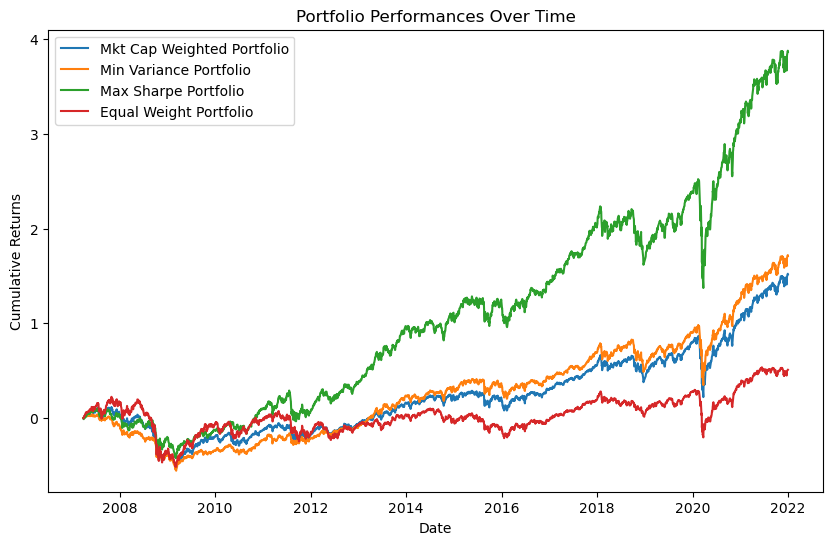

In [19]:
ls_portfolio.plot_performance(index_df, custom_weights=custom_weigths)

C:\Users\d2149\AppData\Local\Temp\ipykernel_24184\2325936788.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


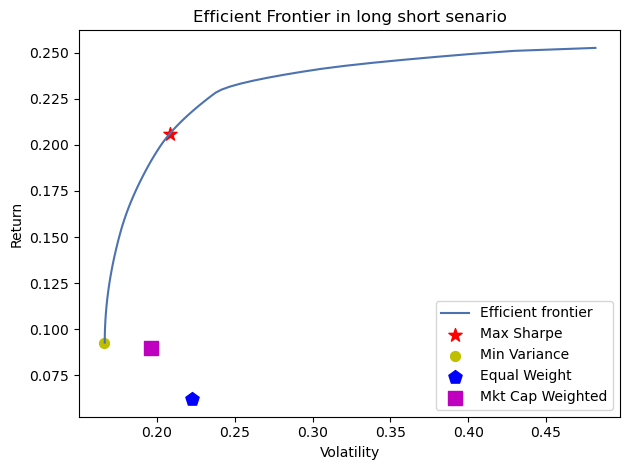

In [31]:
mu = returns_df.mean()*252
cov= returns_df.cov()*252
ef = EfficientFrontier(mu, cov, weight_bounds=(-1, 1))

fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate=0.00)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Find the min_var portfolio
plt.scatter(0.16582570142434142, 0.09243536876523031, s=50, c="y", marker = 'o', label="Min Variance")

# Find the Equal Weight Portfolio
plt.scatter(0.22268786570377302, 0.06216202345229385, s=100, c="b", marker = 'p', label="Equal Weight", zorder = 2)

# Find the Mkt Cap Weighted portfolio
plt.scatter(0.19599724489887774, 0.08969246261501455, s=100, c="m" , marker = 's', label="Mkt Cap Weighted",zorder = 2)

# Output
ax.set_title("Efficient Frontier in long short senario")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [13]:
ls_portfolio.print_all_weights()

       Indices  Min Variance Portfolio Weights  Max Sharpe Portfolio Weights
0  SPTSX INDEX                        0.082040                     -0.097202
1    CAC INDEX                       -0.104296                      0.226909
2    DAX INDEX                        0.050929                      1.000000
3   SX5E INDEX                       -0.037376                     -1.000000
4    NKY INDEX                        0.372525                      0.478015
5    UKX INDEX                        0.197199                     -0.508645
6    SPX INDEX                        0.583003                      1.000000
7   IBOV INDEX                       -0.144024                     -0.099077


### Long Only Scenario

In [32]:
returns_df = index_df.pct_change().dropna()

portfolio = Portfolio_Optimizer(returns_df)

In [33]:
market_cap_weights = np.array(weight_df['MktCap%'])

custom_weigths = {
    'Mkt Cap Weighted Portfolio': market_cap_weights
}

portfolio.performance_summary(custom_weights=custom_weigths)


Max Sharpe Portfolio:
   - Return: 0.10479054925991783
   - Standard Deviation (Risk): 0.17650261073944815
   - Sharpe Ratio: 0.593705378186212

Min Variance Portfolio:
   - Return: 0.09390923670506174
   - Standard Deviation (Risk): 0.1714903805307943
   - Sharpe Ratio: 0.5476064395821816

Equal Weight Portfolio:
   - Return: 0.06216202345229385
   - Standard Deviation (Risk): 0.22268786570377302
   - Sharpe Ratio: 0.279144188013297

Mkt Cap Weighted Portfolio:
   - Return: 0.08969246261501455
   - Standard Deviation (Risk): 0.19599724489887774
   - Sharpe Ratio: 0.4576210377920885


In [34]:
portfolio.print_all_weights()

       Indices  Min Variance Portfolio Weights  Max Sharpe Portfolio Weights
0  SPTSX INDEX                    2.622875e-17                  0.000000e+00
1    CAC INDEX                    2.971104e-17                  0.000000e+00
2    DAX INDEX                    0.000000e+00                  0.000000e+00
3   SX5E INDEX                    1.151446e-18                  0.000000e+00
4    NKY INDEX                    3.875035e-01                  2.761847e-01
5    UKX INDEX                    5.928625e-02                  2.949357e-16
6    SPX INDEX                    5.532103e-01                  7.238153e-01
7   IBOV INDEX                    0.000000e+00                  0.000000e+00


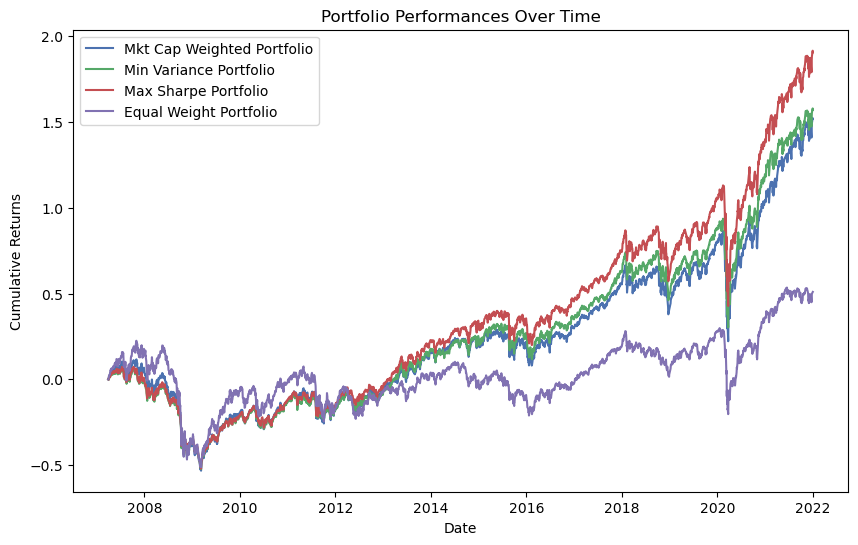

In [35]:
portfolio.plot_performance(index_df, custom_weights=custom_weigths)

c:\Users\d2149\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\d2149\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(
C:\Users\d2149\AppData\Local\Temp\ipykernel_24184\3892193712.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


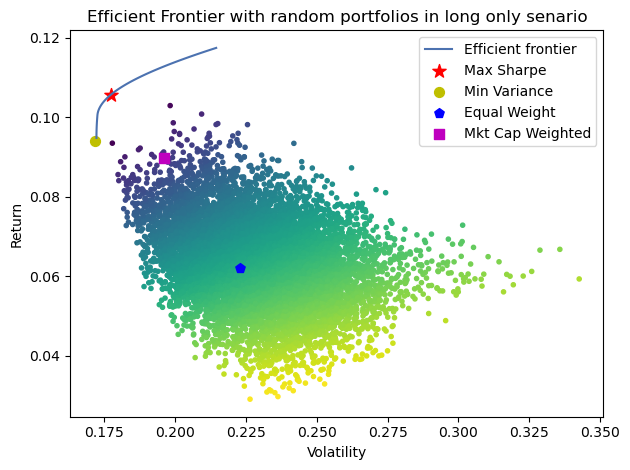

In [36]:
mu = returns_df.mean()*252
cov= returns_df.cov()*252
ef = EfficientFrontier(mu, cov, weight_bounds=(0, 1))



fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe(risk_free_rate=0.00)
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Find the min_var portfolio
plt.scatter(0.1714903805307943, 0.09390923670506174, s=50, c="y", marker = 'o', label="Min Variance")

# Find the Equal Weight Portfolio
plt.scatter(0.22268786570377302, 0.06216202345229385, s=50, c="b", marker = 'p', label="Equal Weight", zorder = 2)

# Find the Mkt Cap Weighted portfolio
plt.scatter(0.19599724489887774, 0.08969246261501455, s=50, c="m" , marker = 's', label="Mkt Cap Weighted",zorder = 2)

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r", zorder = 1)

# Output
ax.set_title("Efficient Frontier with random portfolios in long only senario")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()


In [37]:
portfolio.print_all_weights()

       Indices  Min Variance Portfolio Weights  Max Sharpe Portfolio Weights
0  SPTSX INDEX                    2.622875e-17                  0.000000e+00
1    CAC INDEX                    2.971104e-17                  0.000000e+00
2    DAX INDEX                    0.000000e+00                  0.000000e+00
3   SX5E INDEX                    1.151446e-18                  0.000000e+00
4    NKY INDEX                    3.875035e-01                  2.761847e-01
5    UKX INDEX                    5.928625e-02                  2.949357e-16
6    SPX INDEX                    5.532103e-01                  7.238153e-01
7   IBOV INDEX                    0.000000e+00                  0.000000e+00


## Question 3

In [20]:
rw_returns_df = returns_df.loc['01/04/2008':]


rw_returns_df.index = pd.to_datetime(rw_returns_df.index)
index_df.index = pd.to_datetime(index_df.index)


# Initialize empty DataFrames to store performance values
min_var_df = pd.DataFrame(index=rw_returns_df.index, columns=['Min_Var_Sharpe_performance'])
max_sharpe_df = pd.DataFrame(index=rw_returns_df.index, columns=['Max_Sharpe_performance'])
mkt_cap_df = pd.DataFrame(index=rw_returns_df.index, columns=['Mkt_Cap_performance'])

min_var_weights_df = []
max_sharpe_weights_df = []
mkt_cap_weights_df = []

# Iterate through each rolling window
for year_start in range(2012, 2022):  # Adjust the start year accordingly
    # Define the start and end dates for the current window
    start_date = rw_returns_df.index[rw_returns_df.index.year == year_start - 4].min()
    end_date = rw_returns_df.index[rw_returns_df.index.year == year_start].max()

    # Extract the data for the previous 5 years
    prev_window_data = rw_returns_df.loc[start_date:end_date]

    # Calculate weights for the previous 5 years
    tmp_portfolio = Portfolio_Optimizer(prev_window_data)

    min_var_weights = tmp_portfolio.min_variance_weights
    min_var_weights_df.append(min_var_weights)
    
    max_sharpe_weights = tmp_portfolio.max_sharpe_weights
    max_sharpe_weights_df.append(max_sharpe_weights)


    mkt_cap_weights_df.append(np.array(weight_df['MktCap%'])
)

    # Extract the data for the current year
    current_window_data = rw_returns_df.loc[start_date:end_date]

    # Calculate performance for the current year and store in DataFrames
    min_var_df.loc[start_date:end_date, 'Min_Var_Sharpe_performance'] = np.dot(current_window_data, min_var_weights)
    max_sharpe_df.loc[start_date:end_date, 'Max_Sharpe_performance'] = np.dot(current_window_data, max_sharpe_weights)
    mkt_cap_df.loc[start_date:end_date, 'Mkt_Cap_performance'] = np.dot(current_window_data, market_cap_weights)


# Optionally, concatenate the DataFrames horizontally if needed
portfolio_data = pd.concat([max_sharpe_df, min_var_df, mkt_cap_df], axis=1)

# Filter data from 2013 onwards
portfolio_data = portfolio_data.loc['2013':]


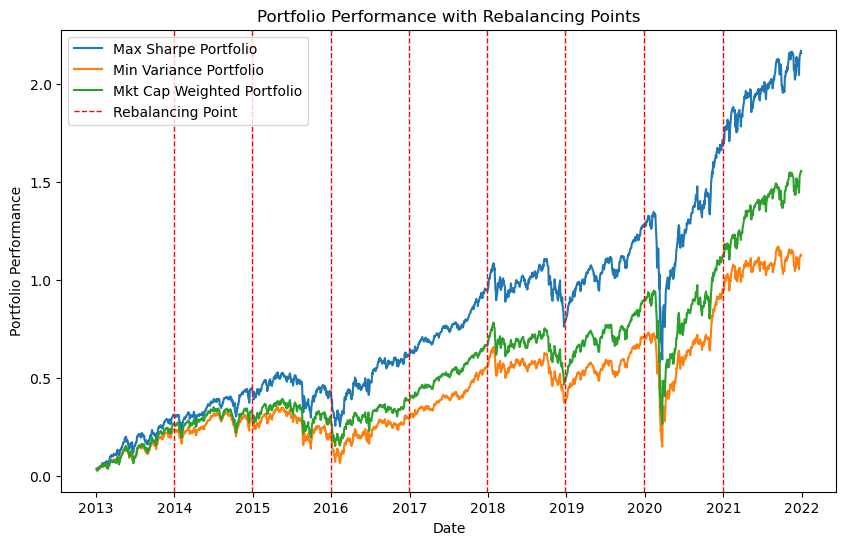

In [21]:
performance_df = (1+ portfolio_data).cumprod() -1

# Plot portfolio performance
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Max_Sharpe_performance'], label='Max Sharpe Portfolio')
plt.plot(performance_df['Min_Var_Sharpe_performance'], label='Min Variance Portfolio')
plt.plot(performance_df['Mkt_Cap_performance'], label='Mkt Cap Weighted Portfolio')

# Highlight each rebalancing point
for year_start in range(2013, rw_returns_df.index.year.max()):
    rebalancing_date = rw_returns_df.index[rw_returns_df.index.year == year_start].max()
    plt.axvline(rebalancing_date, color='red', linestyle='--', linewidth=1, label='Rebalancing Point' if year_start == 2013 else '')

plt.title('Portfolio Performance with Rebalancing Points')
plt.xlabel('Date')
plt.ylabel('Portfolio Performance')
plt.legend()
plt.show()

In [22]:
portfolio_data.head()

,Max_Sharpe_performance,Min_Var_Sharpe_performance,Mkt_Cap_performance
date,,,
2013-01-04,0.040057,0.035278,0.034216
2013-01-07,-0.004937,-0.004307,-0.0041
2013-01-08,-0.002293,-0.001344,-0.001252
2013-01-09,0.004152,0.003554,0.00316
2013-01-10,0.004947,0.004397,0.003354


In [23]:

evaluate_strategies(portfolio_data)

Max Sharpe Portfolio:
   - Return: 0.1560708086137217
   - Standard Deviation (Risk): 0.15119449787598607
   - Sharpe Ratio: 1.0322519060299093

Min Variance Portfolio:
   - Return: 0.10480947812444982
   - Standard Deviation (Risk): 0.14168107079057468
   - Sharpe Ratio: 0.739756394694204

Mkt Cap Weight Portfolio:
   - Return: 0.13030345484269548
   - Standard Deviation (Risk): 0.1564443444835839
   - Sharpe Ratio: 0.8329061384278327


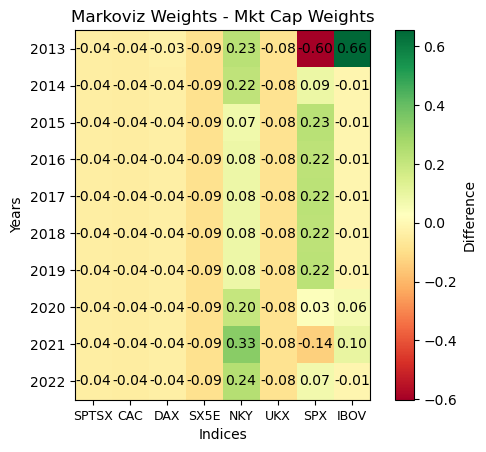

In [24]:
max_sharpe_matrix = np.array(max_sharpe_weights_df)
mkt_cap_matrix = np.array(mkt_cap_weights_df)

# Calculate the difference matrix
difference_matrix = max_sharpe_matrix - mkt_cap_matrix

plot_weight_matrices(difference_matrix, returns_df.columns, 'Markoviz Weights - Mkt Cap Weights')

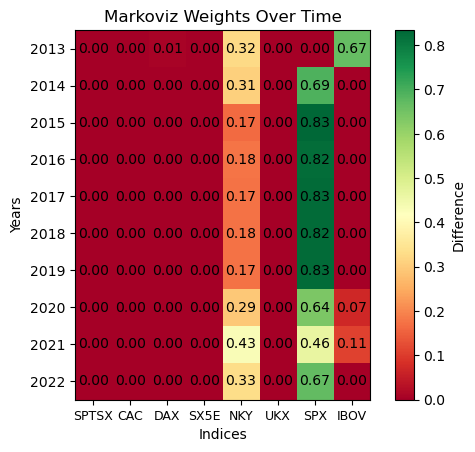

In [25]:
plot_weight_matrices(max_sharpe_matrix, returns_df.columns, 'Markoviz Weights Over Time')